# Identification of High-risk Groups, Prediction of Medical Insurance Fees and Prediction of smoking behavior

# Problem statements
1. Identification of High-risk Groups using K-Means Clustering and Hierarchical Clustering
2. Prediction of Medical Insurance Fees using Linear Regression
3. Prediction of smoking behavior using Logistic Regression and Naive Baye's Classifier

# Dataset Description
- Medical Cost Personal Datasets from Kaggle
- Description of the columns in the dataset:
1. age: primary beneficiary's age
2. sex: Female or male
3. bmi: Body Mass Index, a measure indicating body weight relative to height, calculated as weight in kilograms divided by height in meters squared, with an optimal range between 18.5 and 24.9
4. children: Count of children included in health insurance coverage or number of dependents
5. smoker: Smoking habit
6. region: geographical area of the policyholder's residence in the United States, categorized as northeast, southeast, southwest, or northwest
7. charges: Personal medical expenses invoiced by health insurance

# Data Exploration

In [135]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,f1_score,precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

In [136]:
df = pd.read_csv('Downloads/insurance.csv',header=0)

In [137]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [138]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [140]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [141]:
dummy_df = pd.get_dummies(df['region'], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df.drop('region', axis=1, inplace=True)

In [142]:
dummy_df = pd.get_dummies(df['sex'], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df.drop('sex', axis=1, inplace=True)

In [143]:
dummy_df = pd.get_dummies(df['smoker'], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df.drop('smoker', axis=1, inplace=True)
df.rename(columns={'yes': 'smoker'}, inplace=True)
df

,age,bmi,children,charges,northwest,southeast,southwest,male,smoker
0,19,27.900,0,16884.92400,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,1,0,0,0
1336,21,25.800,0,2007.94500,0,0,1,0,0


In [144]:
df.describe()

,age,bmi,children,charges,northwest,southeast,southwest,male,smoker
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.242900,0.272048,0.242900,0.505232,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.428995,0.445181,0.428995,0.500160,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,1.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


([<matplotlib.patches.Wedge at 0x1b198b6bf10>,
 [Text(-1.7602052664556518, 1.3197262670500234, '0'),
  Text(1.7602052664556516, -1.3197262670500236, '1')],
 [Text(-0.9601119635212645, 0.7198506911181944, '80%'),
  Text(0.9601119635212643, -0.7198506911181946, '20%')])

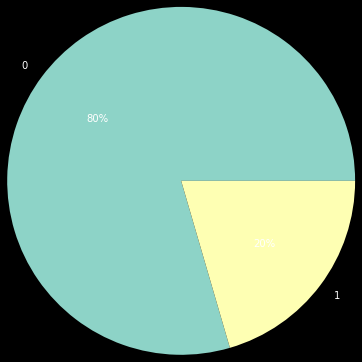

In [145]:
plt.pie(x=df['smoker'].value_counts(), labels = df['smoker'].value_counts().index,radius=2, autopct="%1.0f%%")

The numbers of smoker are less than non-smoker in this dataset.

<AxesSubplot:xlabel='charges', ylabel='Count'>

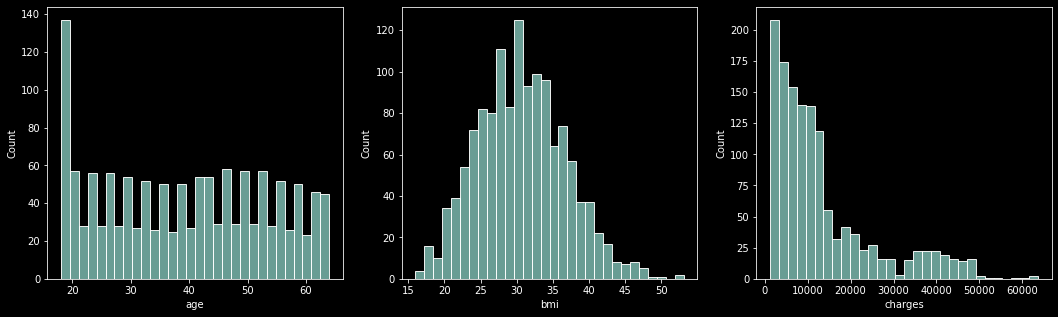

In [146]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(ax=axes[0], data=df, x=df['age'], bins=30)
sns.histplot(ax=axes[1], data=df, x=df['bmi'], bins=30)
sns.histplot(ax=axes[2], data=df, x=df['charges'], bins=30)

In [147]:
df.corr()

,age,bmi,children,charges,northwest,southeast,southwest,male,smoker
age,1.000000,0.109272,0.042469,0.299008,-0.000407,-0.011642,0.010016,-0.020856,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,-0.135996,0.270025,-0.006205,0.046371,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.024806,-0.023066,0.021914,0.017163,0.007673
charges,0.299008,0.198341,0.067998,1.000000,-0.039905,0.073982,-0.043210,0.057292,0.787251
northwest,-0.000407,-0.135996,0.024806,-0.039905,1.000000,-0.346265,-0.320829,-0.011156,-0.036945
southeast,-0.011642,0.270025,-0.023066,0.073982,-0.346265,1.000000,-0.346265,0.017117,0.068498
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.320829,-0.346265,1.000000,-0.004184,-0.036945
male,-0.020856,0.046371,0.017163,0.057292,-0.011156,0.017117,-0.004184,1.000000,0.076185
smoker,-0.025019,0.003750,0.007673,0.787251,-0.036945,0.068498,-0.036945,0.076185,1.000000


<AxesSubplot:>

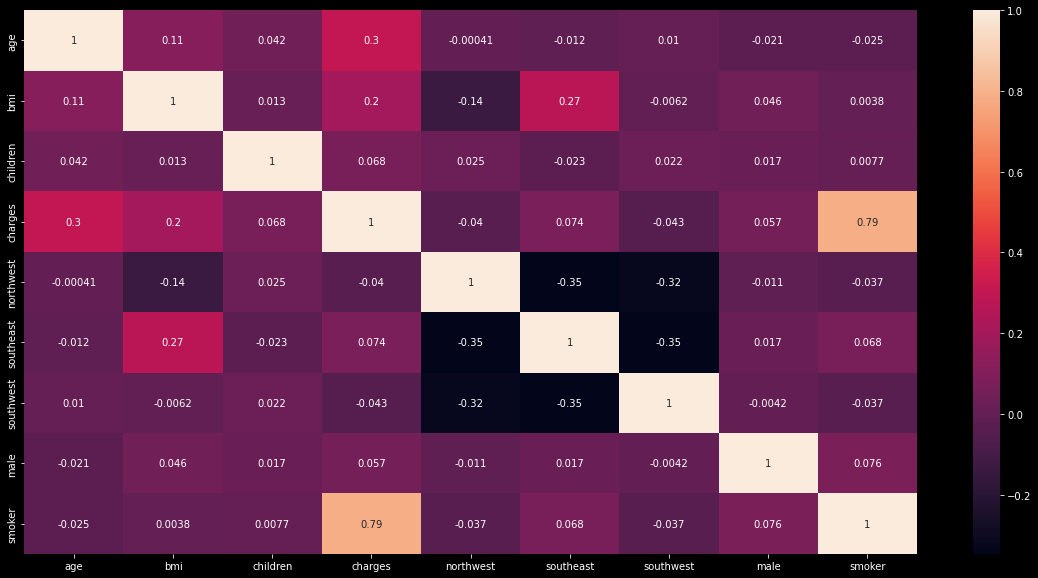

In [148]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot= True)

The correlation between smoker and charges is strong and positive. In addition, most of the correlated relationships is weak, and there are some negative correlated relationships in the dataset.

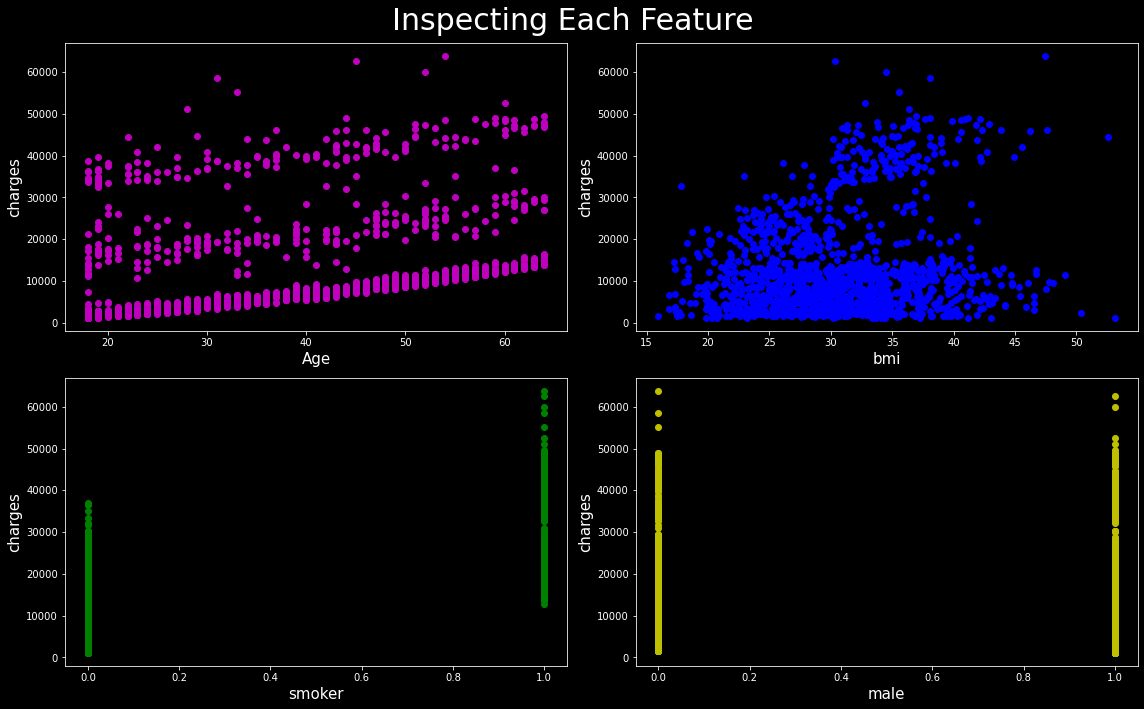

In [149]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,10))
plt.suptitle('Inspecting Each Feature', fontsize = 30)

axes[0,0].plot(df['age'],df['charges'],'mo')
axes[0,0].set_ylabel("charges", fontsize = 15)
axes[0,0].set_xlabel("Age", fontsize = 15)

axes[0,1].plot(df['bmi'],df['charges'],'bo')
axes[0,1].set_ylabel("charges", fontsize = 15)
axes[0,1].set_xlabel("bmi", fontsize = 15)


axes[1,0].plot(df['smoker'],df['charges'],'go')
axes[1,0].set_ylabel('charges', fontsize = 15)
axes[1,0].set_xlabel("smoker", fontsize = 15)

axes[1,1].plot(df['male'],df['charges'],'yo')
axes[1,1].set_ylabel("charges", fontsize = 15)
axes[1,1].set_xlabel('male', fontsize = 15)

plt.tight_layout();

# Standardize the data and apply PCA

In [150]:
X = df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.43876426, -0.45332   , -0.90861367, ...,  1.76548098,
        -1.0105187 ,  1.97058663],
       [-1.50996545,  0.5096211 , -0.07876719, ..., -0.56641788,
         0.98959079, -0.5074631 ],
       [-0.79795355,  0.38330685,  1.58092576, ..., -0.56641788,
         0.98959079, -0.5074631 ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ..., -0.56641788,
        -1.0105187 , -0.5074631 ],
       [-1.29636188, -0.79781341, -0.90861367, ...,  1.76548098,
        -1.0105187 , -0.5074631 ],
       [ 1.55168573, -0.26138796, -0.90861367, ..., -0.56641788,
        -1.0105187 ,  1.97058663]])

In [151]:
pca = PCA(n_components = 2)
X_pca2 = pca.fit_transform(X_scaled)
X_pca2

array([[ 0.50619297, -0.86869692],
       [-0.4497628 ,  2.09701037],
       [-0.08878075,  1.75571836],
       ...,
       [-0.57107433,  2.39649589],
       [-1.79828684,  0.01808811],
       [ 1.74407309, -2.28477325]])

# K-Means Clustering

In [152]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_pca2)
    wcss.append(kmeans.inertia_)

C:\Users\ckaha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


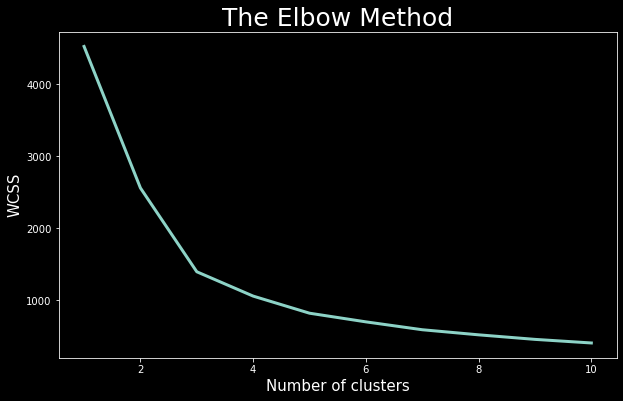

In [153]:
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss, lw = 3)
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize =15 )
plt.show()

In [154]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_pred_k = kmeans.fit_predict(X_pca2)

In [155]:
kmeans.cluster_centers_

array([[ 2.3732123 , -0.77396124],
       [-0.82423677, -0.44771554],
       [ 0.06740966,  1.64403231]])

In [156]:
y_pred_k

array([1, 2, 2, ..., 2, 1, 0])

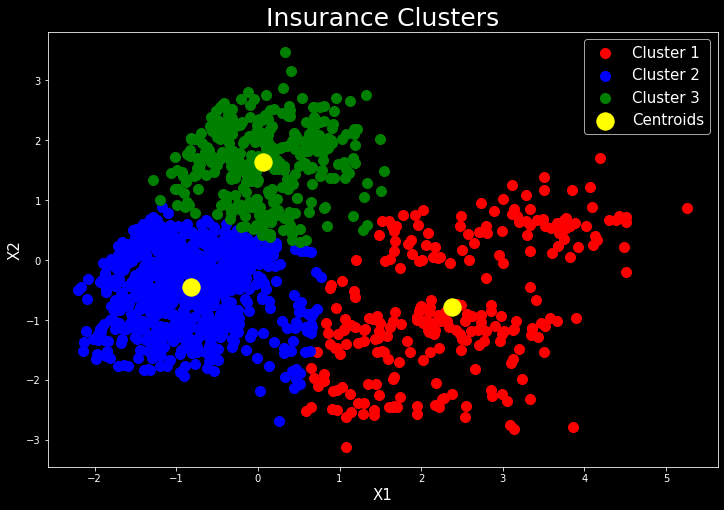

In [157]:
plt.figure(figsize = (12,8))
plt.scatter(X_pca2[y_pred_k == 0, 0], X_pca2[y_pred_k == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_pca2[y_pred_k == 1, 0], X_pca2[y_pred_k == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_pca2[y_pred_k == 2, 0], X_pca2[y_pred_k == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Insurance Clusters', fontsize = 25)
plt.xlabel('X1', fontsize = 15)
plt.ylabel('X2', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [158]:
print(f'CH-Index(n = 3) : {sklearn.metrics.calinski_harabasz_score(X_pca2, y_pred_k)}')
print(f'Silhouette Score(n = 3) : {silhouette_score(X_pca2, y_pred_k)}')

CH-Index(n = 3) : 1497.1266523242136
Silhouette Score(n = 3) : 0.48985487740819667


# Hierarchical Clustering

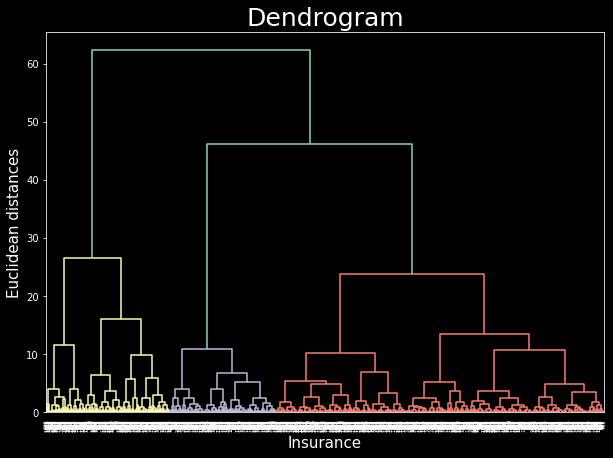

In [159]:
plt.figure(figsize = (10,7))
linkage_data = linkage(X_pca2, method='ward', metric='euclidean')
Dendrogram = dendrogram(linkage_data)
plt.title('Dendrogram', fontsize = 25)
plt.xlabel('Insurance', fontsize = 15)
plt.ylabel('Euclidean distances',fontsize = 15)
plt.show()

In [160]:
hc = AgglomerativeClustering(n_clusters = 3)
y_pred_h = hc.fit_predict(X_pca2)

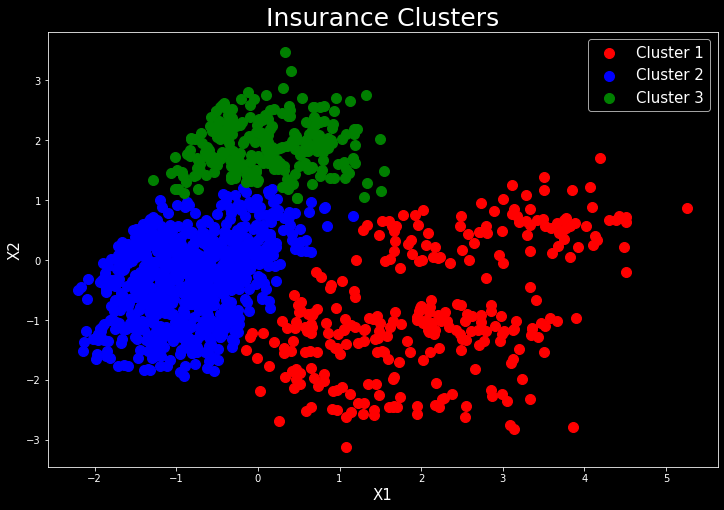

In [161]:
plt.figure(figsize = (12,8))
plt.scatter(X_pca2[y_pred_h == 0, 0], X_pca2[y_pred_h == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_pca2[y_pred_h == 1, 0], X_pca2[y_pred_h == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_pca2[y_pred_h == 2, 0], X_pca2[y_pred_h == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Insurance Clusters', fontsize = 25)
plt.xlabel('X1', fontsize = 15)
plt.ylabel('X2', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [162]:
print(f'CH-Index(n = 3) : {sklearn.metrics.calinski_harabasz_score(X_pca2, y_pred_h)}')
print(f'Silhouette Score(n = 3) : {silhouette_score(X_pca2, y_pred_h)}')

CH-Index(n = 3) : 1328.3976525841133
Silhouette Score(n = 3) : 0.47934984694363914


K-Means Clustering and Hierarchical Clustering identify meaningful patterns. The CH-Index and Silhouette Score of K-Means Clustering are slightly better than Hierarchical Clustering. Therefore, we add the cluster labels of K-Means Clustering to the original DataFrame and show the means of the features bwtween those three cluster labels.

In [163]:
df['cluster_kmean'] = y_pred_k  # Add the cluster labels to the original DataFrame
cluster_kmean_summary = df.groupby('cluster_kmean').mean()
print(cluster_kmean_summary)

                     age        bmi  children       charges  northwest  \
cluster_kmean                                                            
0              40.791339  31.632087  1.208661  33823.847369   0.208661   
1              38.621372  28.708443  1.102902   8527.182850   0.358839   
2              39.334356  34.454218  0.987730   8285.163063   0.000000   

               southeast  southwest      male    smoker  
cluster_kmean                                            
0               0.354331   0.204724  0.610236  0.968504  
1               0.000000   0.337731  0.476253  0.034301  
2               0.840491   0.052147  0.490798  0.006135  


We can observe that cluster 0 has the highest means in the 'smokers' feature, cluster 1 has intermediate means, and cluster 2 has the lowest means. Consequently, we can classify cluster 0 as the highest risk group, cluster 1 as the moderate risk group, and cluster 2 as the lowest risk group.

# Linear Regression

In [164]:
X = df[['age','bmi','children','northwest','southeast','southwest','male','smoker']]
y = df['charges']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [166]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [167]:
lr = LinearRegression()

In [168]:
lr.fit(X_train,y_train)
print("Intercept:", lr.intercept_.round(2))
print("Coefficient:", lr.coef_.round(2))

Intercept: 13346.09
Coefficient: [ 3.61498e+03  2.03623e+03  5.16890e+02 -1.58140e+02 -2.90160e+02
 -3.49110e+02 -9.29000e+00  9.55848e+03]


In [169]:
y_pred = lr.predict(X_test)

In [170]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

RMSE: 5796.284659276274
R2: 0.7835929767120722


# Logistic Regression

In [171]:
X = df[['age','bmi','children','northwest','southeast','southwest','male','charges']]
y=df['smoker']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [174]:
log_reg = LogisticRegression()

In [175]:
LR = log_reg.fit(X_train,y_train)

In [176]:
y_pred = LR.predict(X_test)

In [177]:
LR.predict_proba(X_test)

array([[9.86508827e-01, 1.34911726e-02],
       [9.97089574e-01, 2.91042613e-03],
       [3.83550277e-01, 6.16449723e-01],
       [9.84490351e-01, 1.55096487e-02],
       [8.27841352e-03, 9.91721586e-01],
       [9.99896808e-01, 1.03191516e-04],
       [9.64528247e-01, 3.54717535e-02],
       [9.99159281e-01, 8.40718858e-04],
       [8.89308582e-01, 1.10691418e-01],
       [9.92764293e-01, 7.23570718e-03],
       [3.69223532e-01, 6.30776468e-01],
       [9.96345810e-01, 3.65419020e-03],
       [9.95496822e-01, 4.50317836e-03],
       [3.08504972e-02, 9.69149503e-01],
       [1.97772035e-02, 9.80222796e-01],
       [2.12457511e-02, 9.78754249e-01],
       [9.99879478e-01, 1.20522497e-04],
       [2.26131541e-02, 9.77386846e-01],
       [9.93453257e-01, 6.54674251e-03],
       [5.47508750e-01, 4.52491250e-01],
       [9.69665977e-01, 3.03340231e-02],
       [9.98072153e-01, 1.92784686e-03],
       [9.95080636e-01, 4.91936435e-03],
       [9.99730503e-01, 2.69497114e-04],
       [9.935350

In [178]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9664179104477612


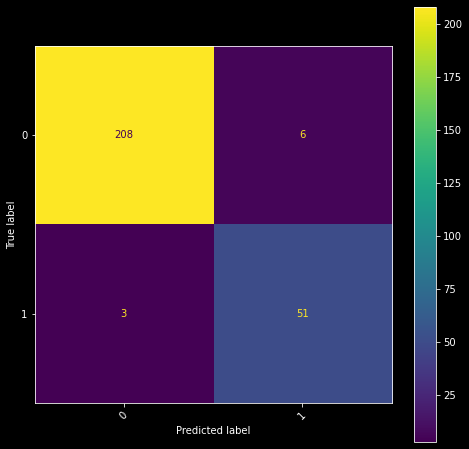

In [179]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

In [180]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred, normalize=True)]
,"Precision":[precision_score(y_test, y_pred, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred, average = 'macro')]})


In [181]:
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.966418,0.940259,0.958204,0.948871


# Naive Baye's Classifier

In [182]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [183]:
y_pred_NB = NB.predict(X_test)

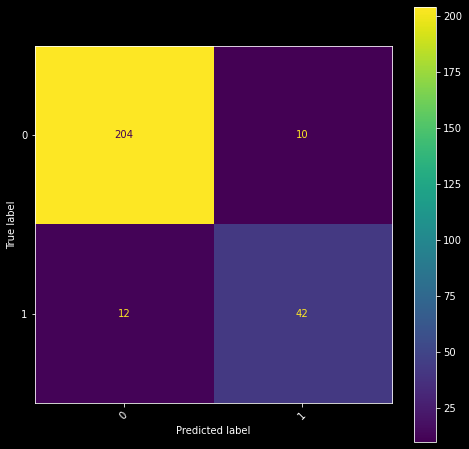

In [184]:
cm = confusion_matrix(y_test, y_pred_NB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

In [185]:
Accuracy = np.mean(y_pred_NB == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 91.79


In [186]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred_NB, normalize=True)]
,"Precision":[precision_score(y_test, y_pred_NB, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred_NB, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred_NB, average = 'macro')]})

In [187]:
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.91791,0.876068,0.865524,0.870645


# Discussion

Clustering experiments: 

- K-Means Clustering and Hierarchical Clustering identify meaningful patterns.  - DBSCAN yielded less distinct clusters but showed promise for specific scenarios.


Linear regression model developed for predicting medical insurance fees:

- Exhibit promising results, with a reasonably low RMSE and a respectable R-squared value.
- The positive coefficient for "smoker" confirms its significant impact on increased medical costs.
- Residential region and gender showed evident influence with negative coefficients on insurance fees.
 

Logistic regression model and Naive Baye's Classifier for predicting smoking behavior 

- Logistic regression model has an impressive accuracy, precision, recall, and F1-score
- The performance of Logistic regression is better than Naive Baye's Classifier in this dataset.
- Logistic regression accurately classifies individuals as smokers or non-smokers based on their characteristics.
- Medical insurance fees matter for public health interventions and anti-smoking campaigns.
